<a href="https://colab.research.google.com/github/sunrinint/BigData_2021/blob/main/210608_DecisionTree_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#결정트리 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris.target_names, feature_names = iris.feature_names, impurity = True, filled = True)



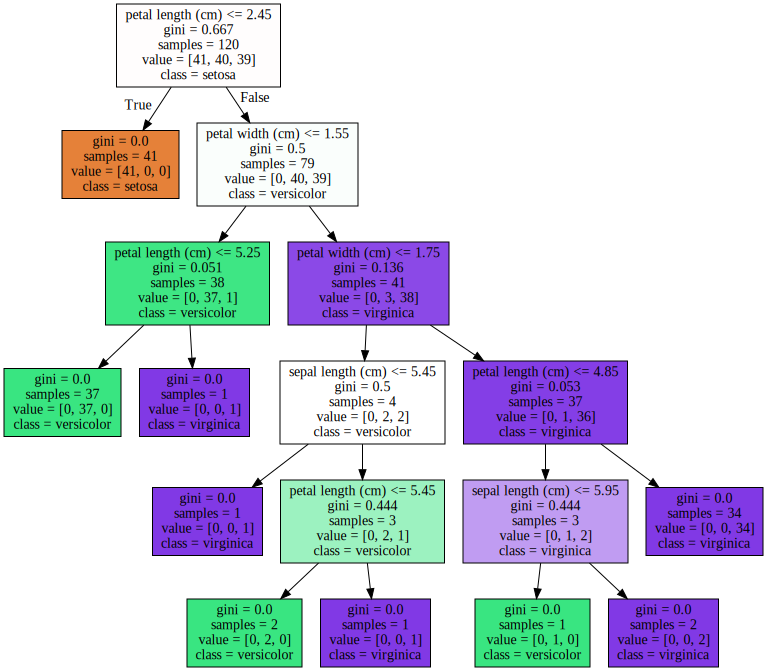

In [4]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

Feature importances:  [0.02500521 0.         0.55490281 0.42009198]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


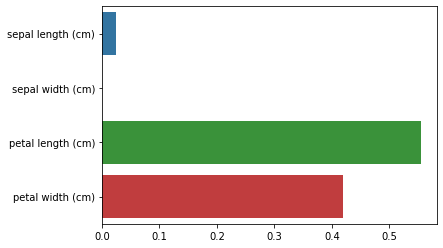

In [5]:
# 피처 중요도
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances: ", dt_clf.feature_importances_)

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)
